In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob
import numpy as np

### 1. Cross-Validation

In [2]:
report_files = glob.glob('report_files/cross_validation_report_base*.json')
highest_timestamp_file = max(report_files, key=lambda x: x[-16:-5])

with open(highest_timestamp_file, 'r') as file:
    data = json.load(file)

print(f"Loaded data from file: {highest_timestamp_file}")

Loaded data from file: report_files/cross_validation_report_base_08241239.json


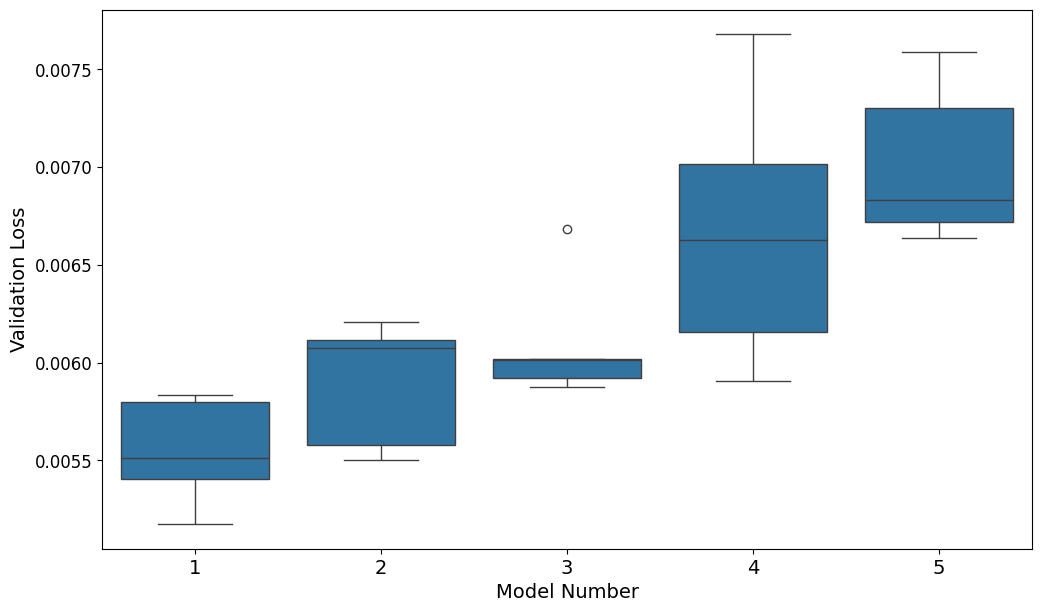

In [3]:
df = pd.DataFrame([
    {
        'model': model.split('], ')[0].replace('architecture=', ''), 
        'val_loss': loss,
        'mean_val_loss': details['mean_val_loss']
    }
    for model, details in data.items()
    for loss in details['val_losses']
])

df_sorted = df.sort_values('mean_val_loss')

unique_models = df_sorted['model'].unique()
model_mapping = {model: idx + 1 for idx, model in enumerate(unique_models)}

df_sorted['model'] = df_sorted['model'].map(model_mapping)

plt.figure(figsize=(12, 7))

sns.boxplot(x='model', y='val_loss', data=df_sorted)

plt.xlabel('Model Number', fontsize=14)
plt.ylabel('Validation Loss', fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=12)  

plt.show()

In [4]:
pd.set_option('display.max_colwidth', None)  
df.drop(columns=['val_loss']).drop_duplicates(subset='model').sort_values(by='mean_val_loss', ascending=True)

,model,mean_val_loss
15,"[{'type': 'transformer_encoder', 'num_heads': 8, 'intermediate_dim': 16, 'dropout': 0.1, 'activation': 'relu'}, {'type': 'transformer_encoder', 'num_heads': 8, 'intermediate_dim': 16, 'dropout': 0.1, 'activation': 'relu'}, {'type': 'transformer_decoder', 'num_heads': 8, 'intermediate_dim': 16, 'dropout': 0.1, 'activation': 'relu'}, {'type': 'transformer_decoder', 'num_heads': 8, 'intermediate_dim': 16, 'dropout': 0.1, 'activation': 'relu'}, {'type': 'flatten'}, {'type': 'dense', 'units': 40}, {'type': 'dense', 'units': 1, 'activation': 'sigmoid'}",0.005545
10,"[{'type': 'transformer_encoder', 'num_heads': 4, 'intermediate_dim': 16, 'dropout': 0.1, 'activation': 'relu'}, {'type': 'transformer_encoder', 'num_heads': 4, 'intermediate_dim': 16, 'dropout': 0.1, 'activation': 'relu'}, {'type': 'transformer_decoder', 'num_heads': 4, 'intermediate_dim': 16, 'dropout': 0.1, 'activation': 'relu'}, {'type': 'transformer_decoder', 'num_heads': 4, 'intermediate_dim': 16, 'dropout': 0.1, 'activation': 'relu'}, {'type': 'flatten'}, {'type': 'dense', 'units': 40}, {'type': 'dense', 'units': 1, 'activation': 'sigmoid'}",0.005896
20,"[{'type': 'lstm', 'units': 64, 'return_sequences': True}, {'type': 'batch_normalization'}, {'type': 'lstm', 'units': 32, 'return_sequences': True}, {'type': 'batch_normalization'}, {'type': 'lstm', 'units': 16, 'return_sequences': False}, {'type': 'batch_normalization'}, {'type': 'dense', 'units': 16}, {'type': 'batch_normalization'}, {'type': 'dense', 'units': 16}, {'type': 'batch_normalization'}, {'type': 'dense', 'units': 1, 'activation': 'sigmoid'}",0.006102
0,"[{'type': 'lstm', 'units': 32, 'return_sequences': True}, {'type': 'batch_normalization'}, {'type': 'lstm', 'units': 16, 'return_sequences': True}, {'type': 'batch_normalization'}, {'type': 'lstm', 'units': 8, 'return_sequences': False}, {'type': 'batch_normalization'}, {'type': 'dense', 'units': 8}, {'type': 'batch_normalization'}, {'type': 'dense', 'units': 8}, {'type': 'batch_normalization'}, {'type': 'dense', 'units': 1, 'activation': 'sigmoid'}",0.006677
5,"[{'type': 'lstm', 'units': 16, 'return_sequences': True}, {'type': 'batch_normalization'}, {'type': 'lstm', 'units': 8, 'return_sequences': True}, {'type': 'batch_normalization'}, {'type': 'lstm', 'units': 4, 'return_sequences': False}, {'type': 'batch_normalization'}, {'type': 'dense', 'units': 4}, {'type': 'batch_normalization'}, {'type': 'dense', 'units': 4}, {'type': 'batch_normalization'}, {'type': 'dense', 'units': 1, 'activation': 'sigmoid'}",0.007015


In [5]:
report_files = glob.glob('report_files/cross_validation_report_fine*.json')
highest_timestamp_file = max(report_files, key=lambda x: x[-16:-5])

with open(highest_timestamp_file, 'r') as file:
    data_fine = json.load(file)

print(f"Loaded data from file: {highest_timestamp_file}")

Loaded data from file: report_files/cross_validation_report_fine_08242147.json


/var/folders/9g/qxrpq3xx3fzcryv3rjsw2scr0000gn/T/ipykernel_48521/2119836607.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['model'] = df_top['model'].map(model_mapping)


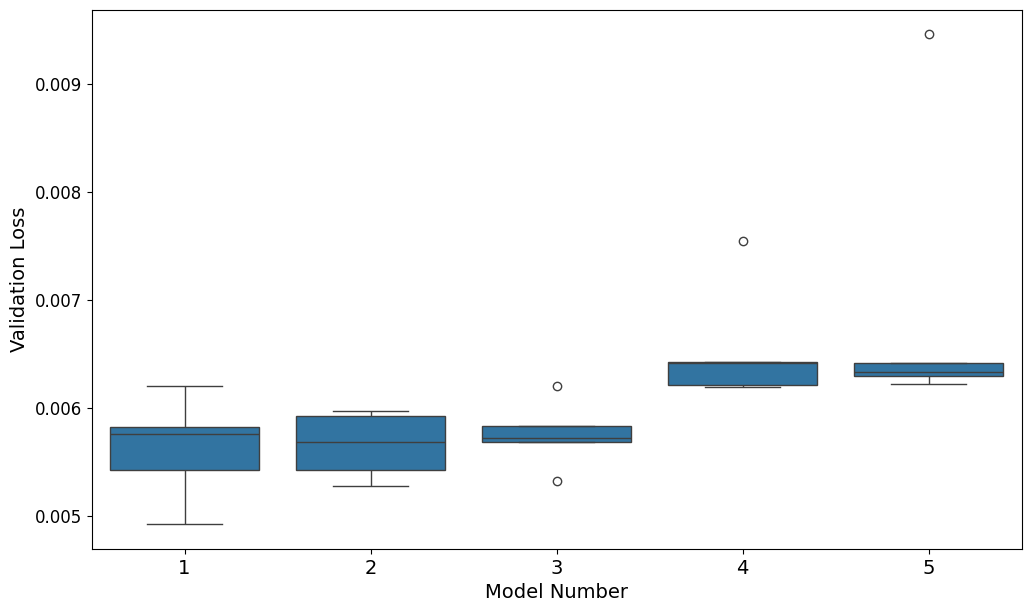

In [6]:
df = pd.DataFrame([
    {
        'model': model.split('], ')[1].replace('optimiser_params=', ''), 
        'val_loss': loss,
        'mean_val_loss': details['mean_val_loss']
    }
    for model, details in data_fine.items()
    for loss in details['val_losses']
])

df_sorted = df.sort_values('mean_val_loss')

top_models = df_sorted['model'].unique()[:5]

df_top = df_sorted[df_sorted['model'].isin(top_models)]

unique_models = df_top['model'].unique()
model_mapping = {model: idx + 1 for idx, model in enumerate(unique_models)}

df_top['model'] = df_top['model'].map(model_mapping)

plt.figure(figsize=(12, 7))

sns.boxplot(x='model', y='val_loss', data=df_top)

plt.xlabel('Model Number', fontsize=14)
plt.ylabel('Validation Loss', fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=12)  

plt.show()

In [7]:
pd.set_option('display.max_colwidth', None)  
df.drop(columns=['val_loss']).drop_duplicates(subset='model').sort_values(by='mean_val_loss', ascending=True).head(5)

,model,mean_val_loss
0,"{'optimiser': 'adam', 'learning_rate': 0.001, 'weight_decay': 0.0, 'scheduler': 'None', 'scheduler_params': 'None', 'batch_size': 64}",0.005623
60,"{'optimiser': 'adam', 'learning_rate': 0.001, 'weight_decay': 1e-05, 'scheduler': 'None', 'scheduler_params': 'None', 'batch_size': 64}",0.005652
55,"{'optimiser': 'adam', 'learning_rate': 0.0001, 'weight_decay': 0.0, 'scheduler': 'None', 'scheduler_params': 'None', 'batch_size': 64}",0.005749
40,"{'optimiser': 'adam', 'learning_rate': 0.1, 'weight_decay': 0.0, 'scheduler': 'cosine_decay', 'scheduler_params': {'min_lr': 0.001, 'warmup_steps': 1500, 'max_lr': 0.01, 'decay_steps': 10000, 'alpha': 0.001}, 'batch_size': 64}",0.006557
45,"{'optimiser': 'adam', 'learning_rate': 0.1, 'weight_decay': 0.0001, 'scheduler': 'cosine_decay', 'scheduler_params': {'min_lr': 0.001, 'warmup_steps': 1500, 'max_lr': 0.01, 'decay_steps': 10000, 'alpha': 0.001}, 'batch_size': 64}",0.006944


### 2. Final Model Trainining

In [8]:
report_files = glob.glob('report_files/final_training_report_*.json')
highest_timestamp_file = max(report_files, key=lambda x: x[-16:-5])

with open(highest_timestamp_file, 'r') as file:
    data = json.load(file)

print(f"Loaded data from file: {highest_timestamp_file}")
from scipy.signal import savgol_filter

Loaded data from file: report_files/final_training_report_08250821.json


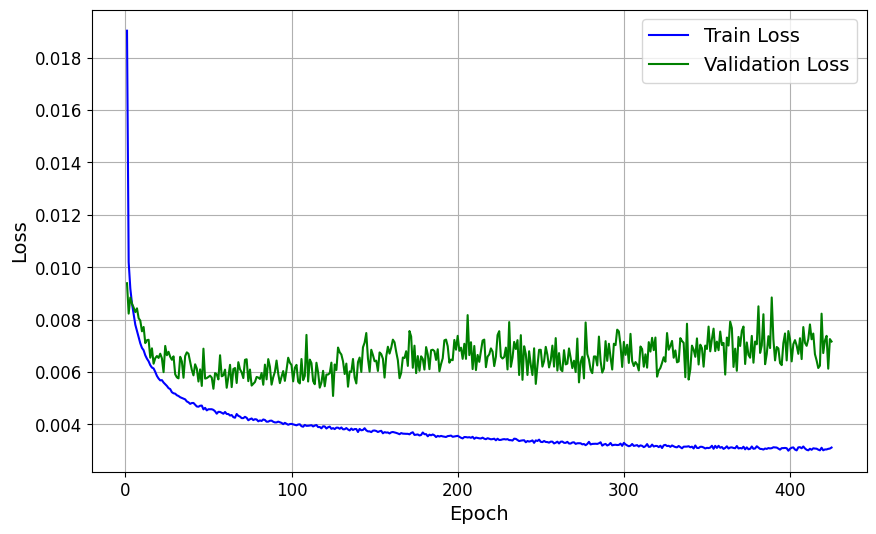

In [9]:
train_losses = data['train_losses']
val_losses = data['val_losses']
epochs = np.array(range(1, len(train_losses) + 1))

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, linestyle='-', color='blue', label='Train Loss')
plt.plot(epochs, val_losses, linestyle='-', color='green', label='Validation Loss')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.show()

In [10]:
with open('report_files/inference_results.json', 'r') as file:
    inferences = json.load(file)

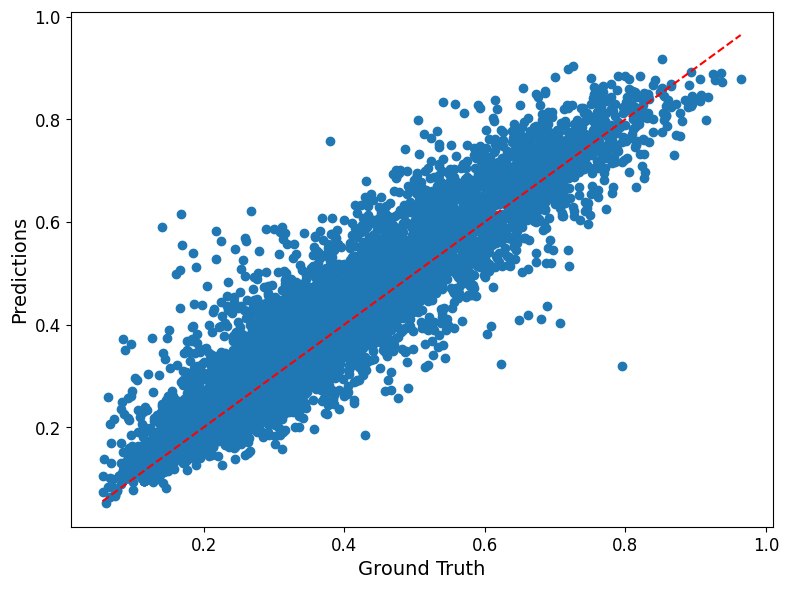

In [11]:
predictions = np.array(inferences['predictions'])  
ground_truth = np.array(inferences['ground_truth']) 

plt.figure(figsize=(8, 6))

ground_truth_flat = ground_truth.flatten()
predictions_flat = predictions.flatten()

plt.scatter(ground_truth_flat, predictions_flat)
plt.plot([min(ground_truth_flat), max(ground_truth_flat)], 
         [min(ground_truth_flat), max(ground_truth_flat)], 
         'r--')

plt.xlabel('Ground Truth', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 

plt.tight_layout()
plt.show()